<a href="https://colab.research.google.com/github/fatima2020-lab/Simulacion-I/blob/main/Colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TABLERO DE COLORES**


# Solución Analitica

En este ejercico el teorema de Probabilidad Condicional esta ligeramente implicto al construir el modelo. Es decir, se usa este teorema en el aspecto de *Si estoy en i posicion/sector , ¿cual es la probabilidad de estar en j?*.

Y conocemos que las probabilidades son:
*  $ CC = \frac{1}{4}$ \\
*  $CX = \frac{1}{2}$ \\
*  $XC = \frac{1}{2}$ \\
*  $XX = \frac{1}{4}$ \\

Entonces para $n=2$ podriamos tener el siguiente sistema tomando en cuenta que estamos en Naranja:

$X_2 = \frac{1}{4} x_1 + 0 y_1 + \frac{1}{4} z_1 + \frac{2}{4} t_1$ \\


$Y_2 = \frac{2}{4} x_1 + \frac{1}{4} y_1 + 0 z_1 + \frac{1}{4} t_1 $ \\


$Z_2 = \frac{1}{4} x_1 + \frac{2}{4} y_1 + \frac{1}{4} z_1 + 0 t_1 $ \\


$t_2 = 0 x_1 + \frac{1}{4} y_1 + \frac{2}{4} z_1 + \frac{1}{4} t_1 $ \\

En general, podemos obtener una matriz de la siguiente forma: \\

\begin{pmatrix}
\frac{1}{4} & 0 & \frac{1}{4} & \frac{2}{4} \\
\frac{2}{4} & \frac{1}{4} & 0 & \frac{1}{4} \\
\frac{1}{4} & \frac{2}{4} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{2}{4}  & \frac{1}{4}
\end{pmatrix}

Donde la suma de cada uno de los elementos es 1 y nos representa que es una distribucion valida cumpliendo con la propiedad de las distribuciones de probabilidad.




# Solución por Simulación

In [7]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [27]:

def movimientos(n_pasos):

    # Asociamos cada número a un color dentro de un diccionario
    colores = {0: 'verde', 1: 'rojo', 2: 'azul', 3: 'amarillo'}

    # Creamos el diccionario para contar visitas por color
    conteo = {color: 0 for color in colores.values()}

    posc_actual = 0  # Empezamos en la posición 0, es decir "verde"

    for _ in range(n_pasos):
        # Movimiento: suma de dos monedas -  Binomial(2, 0.5)
        avance = np.random.binomial(n=2, p=0.5)
        posc_actual = (posc_actual + avance) % 4  # rotación en círculo

        # Actualizamos el color visitado
        color_actual = colores[posc_actual]
        conteo[color_actual] += 1

    # Frecuencias relativas
    total_visitas = sum(conteo.values())
    frecuencia = {color: visitas / total_visitas for color, visitas in conteo.items()}

    return frecuencia


In [31]:
n_pasos = 10000 # num de veces que vamos a simularla
resultado= movimientos(n_pasos)
print("Frecuencia relativa de visitas por color:")
for color, freq in resultado.items():
    print(f"{color}: {freq:.4f}")

Frecuencia relativa de visitas por color:
verde: 0.2442
rojo: 0.2500
azul: 0.2515
amarillo: 0.2543


In [32]:
# Diccionario de colores válidos para matplotlib
coloresc = {'verde': 'green','rojo': 'red','azul': 'blue','amarillo': 'gold'}

# Preparamos datos para graficar
colores = list(resultado.keys())
frecuencias = list(resultado.values())
colores_validos = [coloresc[c] for c in colores]

**¿Son todos los sectores igual de probablies cuando pase mucho tiempo?**

Para una $n_{vez}$ = 15 de pocas repeticiones, podemos ver que la probabilidad de caer en cada sector se nota su cambio en la frecuencia ya que son muy distintas debido a la aleatoriedad.

Sin embargo, para $n_{vez}=100 000$  las probabilidades van de acuerdo con la ley de los grandes numeros, donde al hacer muchos experimentos las frecuencias se estabilizan y reflejan la verdadera probabilidad.


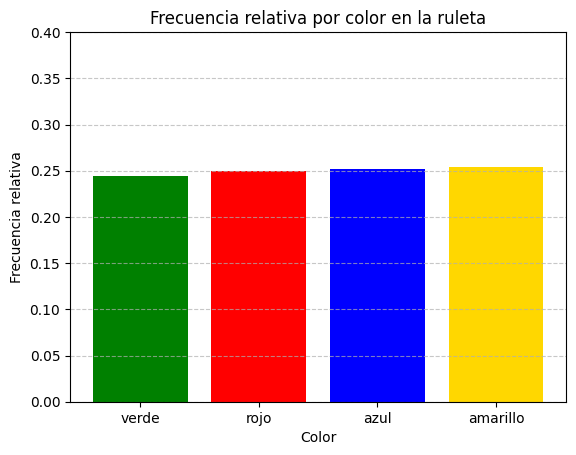

In [33]:
# Graficamos

plt.bar(colores, frecuencias, color=colores_validos)
plt.title("Frecuencia relativa por color en la ruleta")
plt.xlabel("Color")
plt.ylabel("Frecuencia relativa")
plt.ylim(0, 0.4)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()